In [1]:
import pandas as pd
import featurewiz 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



<hr>


#### Data Preprocessing

In [2]:
data=pd.read_csv("datasets/final_feature_extracted.csv")

In [3]:
data1=data[:2500]
data1

,Domain_Name,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
2496,interpark.com,0,0,1,2,0,0,0,0,0,1,1,0,0,1,0,0
2497,torcache.net,0,0,1,2,0,0,0,0,0,1,1,0,0,1,0,0
2498,serverfault.com,0,0,1,3,0,0,1,0,0,0,1,0,0,1,0,0


In [4]:
data2=data[7500:]
data2

,Domain_Name,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
7500,n4r7u.app.link,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
7501,tinyurl.com,0,1,1,1,0,0,1,0,1,1,1,0,0,1,0,1
7502,excellchuyensau.com,0,0,0,3,0,0,0,0,0,0,1,0,0,1,0,1
7503,feciusa-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
7504,hamt.jp,0,0,1,7,0,0,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


In [5]:
l=[data1,data2]
data=pd.concat(l)

In [6]:
data

,Domain_Name,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain_Name    5000 non-null   object
 1   Have_IP        5000 non-null   int64 
 2   Have_At        5000 non-null   int64 
 3   URL_Length     5000 non-null   int64 
 4   URL_Depth      5000 non-null   int64 
 5   Redirection    5000 non-null   int64 
 6   https_Domain   5000 non-null   int64 
 7   TinyURL        5000 non-null   int64 
 8   Prefix_Suffix  5000 non-null   int64 
 9   DNS_Record     5000 non-null   int64 
 10  Domain_Age     5000 non-null   int64 
 11  End_Domain     5000 non-null   int64 
 12  iFrame         5000 non-null   int64 
 13  Mouse_Over     5000 non-null   int64 
 14  Right_Click    5000 non-null   int64 
 15  Web_Forwards   5000 non-null   int64 
 16  label          5000 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 703.1+ KB


In [8]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,0.006000,0.02280,0.770000,3.048400,0.014600,0.000200,0.091400,0.096600,0.11240,0.419000,0.808600,0.093800,0.069800,0.99940,0.108000,0.50000
std,0.077235,0.14928,0.420875,2.094597,0.119957,0.014142,0.288206,0.295442,0.31589,0.493445,0.393442,0.291579,0.254835,0.02449,0.310411,0.50005
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.00000
50%,0.000000,0.00000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.50000
75%,0.000000,0.00000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.00000
max,1.000000,1.00000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [9]:
data.shape

(5000, 17)

In [10]:
data.isnull().sum()

Domain_Name      0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix_Suffix    0
DNS_Record       0
Domain_Age       0
End_Domain       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
label            0
dtype: int64

In [11]:
data=data.drop(columns="Domain_Name",axis=1)

In [12]:
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
9996,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
9997,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
9998,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


In [13]:
x=data.iloc[:,:15]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [14]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [15]:
y['label'].unique()

array([0, 1], dtype=int64)

In [16]:
dtree = DecisionTreeRegressor()
rfecv = RFECV(estimator=dtree, step=1, scoring="neg_mean_squared_error", cv=4, verbose=1,n_jobs = 4)
rfecv.fit(x, y)
rfecv.transform(x)
print(rfecv)
print(rfecv.n_features_)
print(np.where(rfecv.support_ == False)[0]) 

RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=4,
      scoring='neg_mean_squared_error', verbose=1)
15
[]


In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=4)
rf.fit(x_train, y_train)
print('Train set')
pred = rf.predict(x_train)
print('Random Forests accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set')
pred = rf.predict(x_test)
print('Random Forests accuracy: {}'.format(accuracy_score(y_test,pred)))


Train set
Random Forests accuracy: 0.80575
Test set
Random Forests accuracy: 0.805


In [18]:
from featurewiz import featurewiz
target = 'label'
feats = featurewiz(data, target, corr_limit=0.9, verbose=0)
len(feats)
print(feats[0])

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (5000, 16)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
############################################

<hr>

#### Feature Selection

* Filter Methods
* Wrapper Methods

##### Filter methods

In [19]:
#Variance Threshhold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(x_train)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(4000, 15)
0


In [20]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(x_train)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in x_train.columns
                    if column not in x_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(4000, 12)
3
Have_IP
https_Domain
Right_Click


In [21]:
columns=["Have_IP","https_Domain","Right_Click"]

In [22]:
# Corelation Filtering
corr=data.corr()["label"]
corr

Have_IP          0.077693
Have_At          0.112551
URL_Length      -0.546536
URL_Depth       -0.126815
Redirection      0.028346
https_Domain     0.014144
TinyURL          0.085364
Prefix_Suffix    0.310752
DNS_Record       0.040525
Domain_Age      -0.070937
End_Domain      -0.045246
iFrame           0.096724
Mouse_Over       0.051018
Right_Click     -0.024502
Web_Forwards    -0.042528
label            1.000000
Name: label, dtype: float64

<AxesSubplot: >

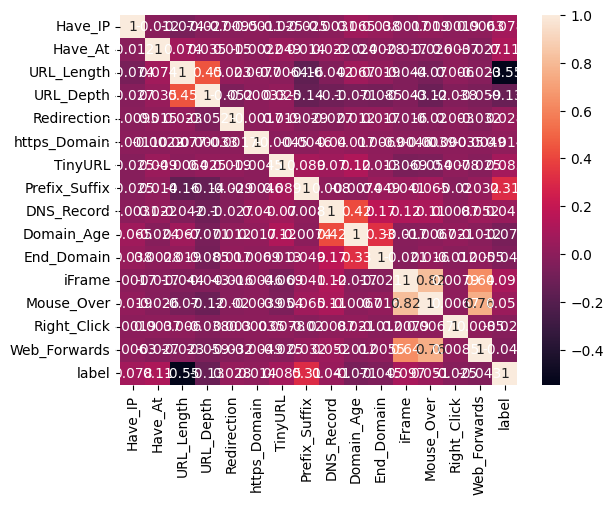

In [23]:
sns.heatmap(data.corr(method='pearson'),annot=True)

In [24]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names


scol=correlation(x,0.7)
print('Correlated columns:',scol)
print(len(scol))

Correlated columns: {'Mouse_Over', 'Web_Forwards'}
2


In [25]:
columns.extend(['Mouse_Over', 'Web_Forwards'])

In [26]:
model_chi2 =SelectKBest(chi2,k=5)
res=model_chi2.fit(x_train,y_train)
cols=model_chi2.get_support(indices=True)
new_features =x_train.iloc[:,cols]
new_features


,Have_At,URL_Length,URL_Depth,TinyURL,Prefix_Suffix
9833,0,0,1,0,0
1218,0,1,18,0,0
135,0,1,2,0,0
8612,0,1,1,0,0
8259,0,1,1,0,0
...,...,...,...,...,...
9149,0,1,5,0,0
1890,0,1,4,0,0
350,0,1,5,0,0
79,0,1,3,0,0


##### Wrapper Methods

In [27]:
# RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(data.iloc[:,:15], data.iloc[:,15])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
res=[]
for i,j in zip(data.columns,fit.support_):
  if j==True:
    res.append(i)
print(res)

Num Features: 7
Selected Features: [ True  True  True False False False False  True False False False  True
 False  True  True]
Feature Ranking: [1 1 1 8 2 3 4 1 6 9 5 1 7 1 1]
['Have_IP', 'Have_At', 'URL_Length', 'Prefix_Suffix', 'iFrame', 'Right_Click', 'Web_Forwards']


In [28]:
#Forward Feature Selection
#importing the necessary libraries
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import sklearn.externals as extjoblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(x_train, y_train)
sfs.k_feature_names_     

('Have_At',
 'URL_Length',
 'URL_Depth',
 'TinyURL',
 'Prefix_Suffix',
 'iFrame',
 'Web_Forwards')

Index(['Right_Click', 'https_Domain', 'Have_IP', 'Mouse_Over', 'Redirection'], dtype='object')

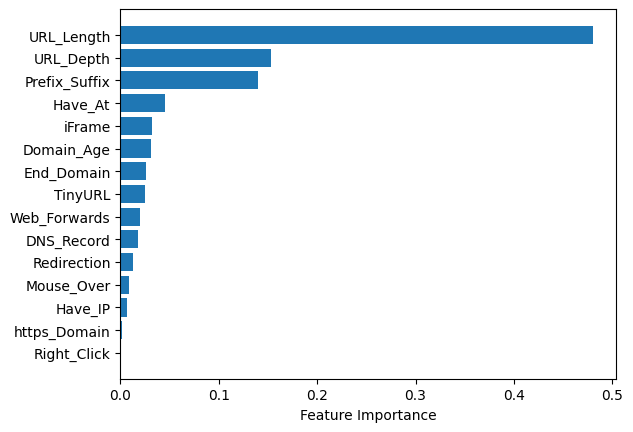

In [29]:
#Feature Importance
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(x_train, y_train)
sort = rf.feature_importances_.argsort()
plt.barh(data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

# print(data.columns[sort])
cols=data.columns[sort][:5]
cols

Feature: 0, Score: 0.006933736727773121
Feature: 1, Score: 0.04602678456463989
Feature: 2, Score: 0.4875840259328534
Feature: 3, Score: 0.17010352390658873
Feature: 4, Score: 0.01050830296533994
Feature: 5, Score: 0.0010731678280672355
Feature: 6, Score: 0.02370993526273832
Feature: 7, Score: 0.1423432308120887
Feature: 8, Score: 0.014345727640108467
Feature: 9, Score: 0.025222841227951143
Feature: 10, Score: 0.017571142644577615
Feature: 11, Score: 0.030961531551962258
Feature: 12, Score: 0.00787259679207776
Feature: 13, Score: 2.7630792313865017e-05
Feature: 14, Score: 0.015715821350919614


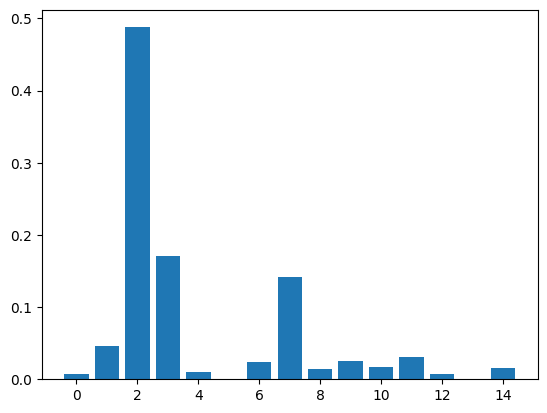

In [30]:
#decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [31]:
# ['URL_Length', 'Prefix_Suffix', 'Have_At', 'Have_IP', 'iFrame', 'Web_Forwards', 'TinyURL']

In [32]:
cols

Index(['Right_Click', 'https_Domain', 'Have_IP', 'Mouse_Over', 'Redirection'], dtype='object')

In [33]:
#Dropping the columns
data=data.drop(columns=cols,axis=1)

In [34]:
data.columns

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix_Suffix',
       'DNS_Record', 'Domain_Age', 'End_Domain', 'iFrame', 'Web_Forwards',
       'label'],
      dtype='object')

In [35]:
print(data.shape)
x=data.iloc[:,:10]
y=data.iloc[:,10]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

(5000, 11)


In [36]:
rf1 = RandomForestClassifier(n_estimators=20, random_state=1, max_depth=4)
rf1.fit(x_train, y_train)
print('Train set')
pred = rf1.predict(x_train)
print('Random Forests accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set')
pred = rf1.predict(x_test)
print('Random Forests accuracy: {}'.format(accuracy_score(y_test,pred)))
  

Train set
Random Forests accuracy: 0.807
Test set
Random Forests accuracy: 0.808


In [37]:
data

,Have_At,URL_Length,URL_Depth,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Web_Forwards,label
0,0,1,1,0,0,0,1,1,0,0,0
1,0,1,1,0,0,0,1,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,0
3,0,1,3,0,0,0,0,1,0,0,0
4,0,1,3,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,5,1,1,0,1,1,0,0,1
9996,0,1,4,0,0,0,0,1,0,0,1
9997,1,1,3,1,0,0,1,1,1,0,1
9998,0,1,5,1,1,0,1,1,0,0,1


In [38]:
# Storing the data in CSV file
data.to_csv('sample.csv', index=False)